<a href="https://colab.research.google.com/github/Sunitakashyap02/STUDENT-PERFORMANCE-PREDICATOR/blob/main/Copy_of_Student_Performance_Predictor_for_EduQuest_Coaching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📘 Student Performance Predictor for EduQuest Coaching
print('Hello from YBI Foundation 🚀')

In [ ]:
# IMPORT LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [ ]:
# CSV file path
 ("/content/Student Performance Predictor.csv")

'/content/Student Performance Predictor.csv'

In [ ]:
#Explore the Data
df.head()

,gender,age,parental_education,family_income,internet_access,previous_exam_score,attendance_rate,homework_completion_rate,class_participation_score,number_of_absences,extra_curricular_involvement,learning_hours_per_week,tutor_support,final_exam_score
0,Male,14,Diploma,29591.84,Yes,93.25,91.01,76.56,9.52,1,Moderate,12.08,No,100.00
1,Male,16,Diploma,35222.46,Yes,85.06,83.85,64.82,3.42,2,Moderate,11.81,Yes,80.81
2,Male,14,Diploma,29730.93,Yes,79.93,86.71,75.02,3.75,1,Low,11.08,Yes,77.96
3,Female,15,Diploma,29074.09,Yes,98.94,88.04,55.50,6.95,0,Moderate,6.65,Yes,98.86
4,Male,19,Graduate,42305.33,Yes,64.54,61.22,98.85,6.03,5,Moderate,9.26,No,64.64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        1000 non-null   object 
 1   age                           1000 non-null   int64  
 2   parental_education            1000 non-null   object 
 3   family_income                 1000 non-null   float64
 4   internet_access               1000 non-null   object 
 5   previous_exam_score           1000 non-null   float64
 6   attendance_rate               1000 non-null   float64
 7   homework_completion_rate      1000 non-null   float64
 8   class_participation_score     1000 non-null   float64
 9   number_of_absences            1000 non-null   int64  
 10  extra_curricular_involvement  628 non-null    object 
 11  learning_hours_per_week       1000 non-null   float64
 12  tutor_support                 1000 non-null   object 
 13  fina

In [ ]:
df.describe()

,age,family_income,previous_exam_score,attendance_rate,homework_completion_rate,class_participation_score,number_of_absences,learning_hours_per_week,final_exam_score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,16.496000,40053.207840,69.92909,80.429630,74.312590,4.923780,1.979000,9.984440,76.024760
std,1.697901,9800.512538,14.30842,11.550007,14.572686,2.909478,1.448674,3.084464,11.214959
min,14.000000,14302.140000,30.00000,60.050000,50.040000,0.030000,0.000000,0.350000,39.840000
25%,15.000000,33566.487500,60.36750,70.547500,61.272500,2.325000,1.000000,7.955000,68.060000
50%,17.000000,40566.090000,69.93500,80.985000,74.265000,4.935000,2.000000,9.955000,76.270000
75%,18.000000,46650.012500,80.00750,90.380000,86.965000,7.425000,3.000000,12.080000,84.180000
max,19.000000,77007.250000,100.00000,99.990000,99.990000,9.990000,8.000000,21.170000,100.000000


In [ ]:
df.dropna()

,gender,age,parental_education,family_income,internet_access,previous_exam_score,attendance_rate,homework_completion_rate,class_participation_score,number_of_absences,extra_curricular_involvement,learning_hours_per_week,tutor_support,final_exam_score
0,Male,14,Diploma,29591.84,Yes,93.25,91.01,76.56,9.52,1,Moderate,12.08,No,100.00
1,Male,16,Diploma,35222.46,Yes,85.06,83.85,64.82,3.42,2,Moderate,11.81,Yes,80.81
2,Male,14,Diploma,29730.93,Yes,79.93,86.71,75.02,3.75,1,Low,11.08,Yes,77.96
3,Female,15,Diploma,29074.09,Yes,98.94,88.04,55.50,6.95,0,Moderate,6.65,Yes,98.86
4,Male,19,Graduate,42305.33,Yes,64.54,61.22,98.85,6.03,5,Moderate,9.26,No,64.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,Male,17,Graduate,36723.49,Yes,64.15,90.50,87.41,1.04,0,Moderate,7.16,Yes,73.56
995,Female,19,Diploma,51026.97,Yes,64.34,63.94,69.18,2.70,3,Low,4.68,No,57.02
996,Female,19,High School,37840.55,Yes,94.37,75.44,54.12,1.09,1,Low,8.44,No,67.84
998,Female,17,High School,26311.07,Yes,72.71,89.40,93.69,6.37,4,Low,10.63,No,80.01


In [ ]:
# DEFINE Y AND X
df.columns

Index(['gender', 'age', 'parental_education', 'family_income',
       'internet_access', 'previous_exam_score', 'attendance_rate',
       'homework_completion_rate', 'class_participation_score',
       'number_of_absences', 'extra_curricular_involvement',
       'learning_hours_per_week', 'tutor_support', 'final_exam_score'],
      dtype='object')

In [ ]:
y = df['final_exam_score']
X = df[['gender', 'age', 'parental_education', 'family_income',
       'internet_access', 'previous_exam_score', 'attendance_rate',
       'homework_completion_rate', 'class_participation_score',
       'number_of_absences', 'extra_curricular_involvement',
       'learning_hours_per_week', 'tutor_support',]]



In [ ]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2529)

In [ ]:
#SELECT MODEL
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [ ]:
# Train model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict
y_pred = model.predict(X_test)

In [ ]:
# Evaluate
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
 mean_absolute_percentage_error(y_test, y_pred)

0.05167499544526651

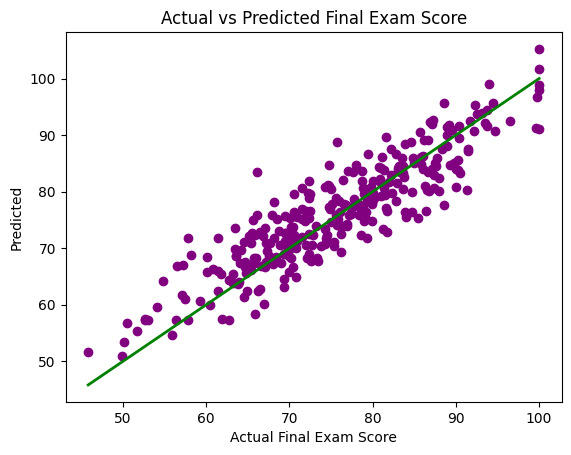

In [ ]:
# Visualize and Predicted
plt.scatter(y_test, y_pred, color ='purple')
plt.plot([ y_test.min(), y_test.max()],[y_test.min(),y_test.max()], color ='green',linewidth=2)
plt.xlabel("Actual Final Exam Score")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Final Exam Score")
plt.show()